Principal component analysis (PCA) attempts to find uncorrelated linear dimensions that capture maximal variance in the data. Exploratory factor analysis (EFA) also attempts to capture variance with a small number of dimensions while seeking to make the dimensions interpretable in terms of the original variables. Multidimensional scaling (MDS) maps similarities among observations in terms of a low-dimension space such as a two-dimensional plot. MDS can work with metric data and with non-metric data such as categorical or ordinal data.

In [1]:
brand.ratings <- read.csv("http://goo.gl/IQl8nc")
head(brand.ratings)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
1,2,4,8,8,2,9,7,4,6,a
2,1,1,4,7,1,1,1,2,2,a
3,2,3,5,9,2,9,5,1,6,a
4,1,6,10,8,3,4,5,2,1,a
5,1,1,5,8,1,9,9,1,1,a
6,2,8,9,5,3,8,7,1,2,a


In [2]:
summary(brand.ratings)

    perform           leader           latest            fun        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 4.000   Median : 4.000   Median : 7.000   Median : 6.000  
 Mean   : 4.488   Mean   : 4.417   Mean   : 6.195   Mean   : 6.068  
 3rd Qu.: 7.000   3rd Qu.: 6.000   3rd Qu.: 9.000   3rd Qu.: 8.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
    serious          bargain           value            trendy     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 3.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 5.00  
 Mean   : 4.323   Mean   : 4.259   Mean   : 4.337   Mean   : 5.22  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.00  
 Max.   :10.000   Max.   :10.000   Max. 

In [3]:
str(brand.ratings)

'data.frame':	1000 obs. of  10 variables:
 $ perform: int  2 1 2 1 1 2 1 2 2 3 ...
 $ leader : int  4 1 3 6 1 8 1 1 1 1 ...
 $ latest : int  8 4 5 10 5 9 5 7 8 9 ...
 $ fun    : int  8 7 9 8 8 5 7 5 10 8 ...
 $ serious: int  2 1 2 3 1 3 1 2 1 1 ...
 $ bargain: int  9 1 9 4 9 8 5 8 7 3 ...
 $ value  : int  7 1 5 5 9 7 1 7 7 3 ...
 $ trendy : int  4 2 1 2 1 1 1 7 5 4 ...
 $ rebuy  : int  6 2 6 1 1 2 1 1 1 1 ...
 $ brand  : Factor w/ 10 levels "a","b","c","d",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
brand.sc <- brand.ratings
brand.sc[, 1:9] <- scale(brand.ratings[, 1:9])
summary(brand.sc)

    perform            leader            latest             fun          
 Min.   :-1.0888   Min.   :-1.3100   Min.   :-1.6878   Min.   :-1.84677  
 1st Qu.:-1.0888   1st Qu.:-0.9266   1st Qu.:-0.7131   1st Qu.:-0.75358  
 Median :-0.1523   Median :-0.1599   Median : 0.2615   Median :-0.02478  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7842   3rd Qu.: 0.6069   3rd Qu.: 0.9113   3rd Qu.: 0.70402  
 Max.   : 1.7206   Max.   : 2.1404   Max.   : 1.2362   Max.   : 1.43281  
                                                                         
    serious           bargain             value             trendy        
 Min.   :-1.1961   Min.   :-1.22196   Min.   :-1.3912   Min.   :-1.53897  
 1st Qu.:-0.8362   1st Qu.:-0.84701   1st Qu.:-0.9743   1st Qu.:-0.80960  
 Median :-0.1163   Median :-0.09711   Median :-0.1405   Median :-0.08023  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.6036   3rd Qu.: 0.652

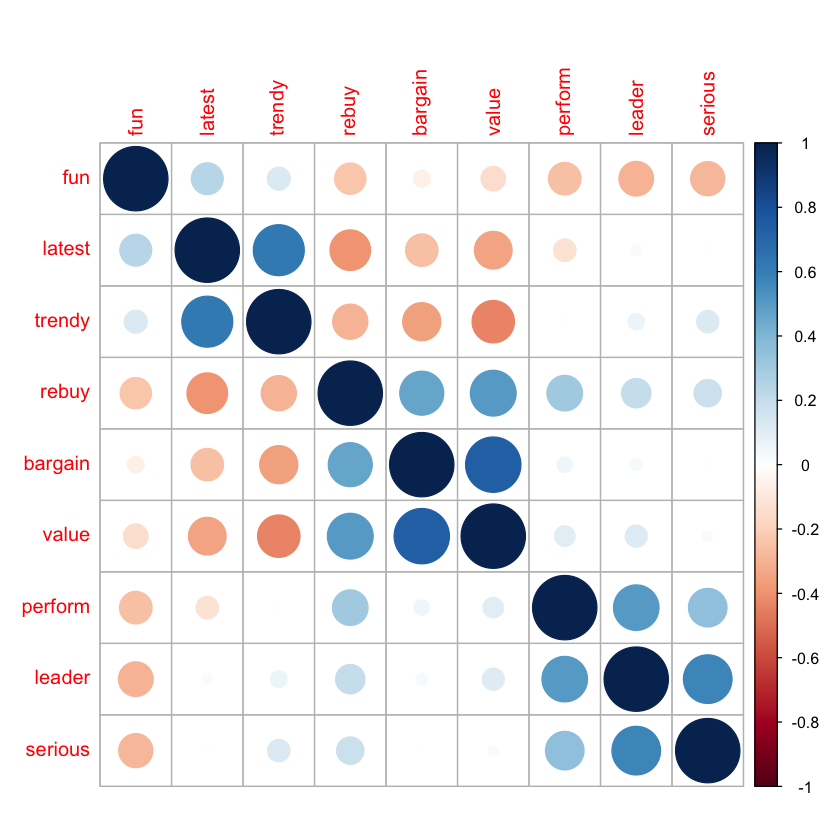

In [5]:
library(corrplot)
corrplot(cor(brand.sc[, 1:9]), order="hclust")

In [6]:
brand.mean <- aggregate(. ~ brand, data=brand.sc, mean) 
brand.mean

,brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
1,a,-0.8859187,-0.5279035,0.4109732,0.6566458,-0.9189407,0.2140961,0.1846926,-0.5251447,-0.5961664
2,b,0.9308702,1.070758,0.7261069,-0.9722147,1.183141,0.04161938,0.1513396,0.7403082,0.2369732
3,c,0.6499235,1.162768,-0.1023372,-0.8446753,1.222735,-0.607043,-0.4406775,0.02552787,-0.1324378
4,d,-0.6798911,-0.5930767,0.3524948,0.1865719,-0.6921751,-0.880756,-0.9326353,0.7366614,-0.4939889
5,e,-0.5643908,0.1928362,0.4564564,0.2958914,0.04211361,0.5515505,0.4181641,0.1385799,0.03654811
6,f,-0.05868665,0.2695106,-1.262159,-0.2179102,0.5892307,0.874007,1.022689,-0.813245,1.356996
7,g,0.9183837,-0.1675336,-1.2849,-0.5167168,-0.5337991,0.8965039,1.25616,-1.276393,1.360926
8,h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.1414586,-0.7382753,-0.7825465,0.8643007,-0.6040262
9,i,0.3346388,-0.3208825,0.3557436,0.4124989,-0.1486575,-0.2545906,-0.8033921,0.5907878,-0.203176
10,j,-0.629945,-0.7885965,-0.154318,0.2849595,-0.6021887,-0.09711188,-0.07379367,-0.4813827,-0.9616475


In [7]:
rownames(brand.mean) <- brand.mean[, 1] # use brand for the row names
brand.mean <- brand.mean[, -1]          # remove brand name column
brand.mean

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.8859187,-0.5279035,0.4109732,0.6566458,-0.9189407,0.2140961,0.1846926,-0.5251447,-0.5961664
b,0.9308702,1.070758,0.7261069,-0.9722147,1.183141,0.04161938,0.1513396,0.7403082,0.2369732
c,0.6499235,1.162768,-0.1023372,-0.8446753,1.222735,-0.607043,-0.4406775,0.02552787,-0.1324378
d,-0.6798911,-0.5930767,0.3524948,0.1865719,-0.6921751,-0.880756,-0.9326353,0.7366614,-0.4939889
e,-0.5643908,0.1928362,0.4564564,0.2958914,0.04211361,0.5515505,0.4181641,0.1385799,0.03654811
f,-0.05868665,0.2695106,-1.262159,-0.2179102,0.5892307,0.874007,1.022689,-0.813245,1.356996
g,0.9183837,-0.1675336,-1.2849,-0.5167168,-0.5337991,0.8965039,1.25616,-1.276393,1.360926
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.1414586,-0.7382753,-0.7825465,0.8643007,-0.6040262
i,0.3346388,-0.3208825,0.3557436,0.4124989,-0.1486575,-0.2545906,-0.8033921,0.5907878,-0.203176
j,-0.629945,-0.7885965,-0.154318,0.2849595,-0.6021887,-0.09711188,-0.07379367,-0.4813827,-0.9616475



Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



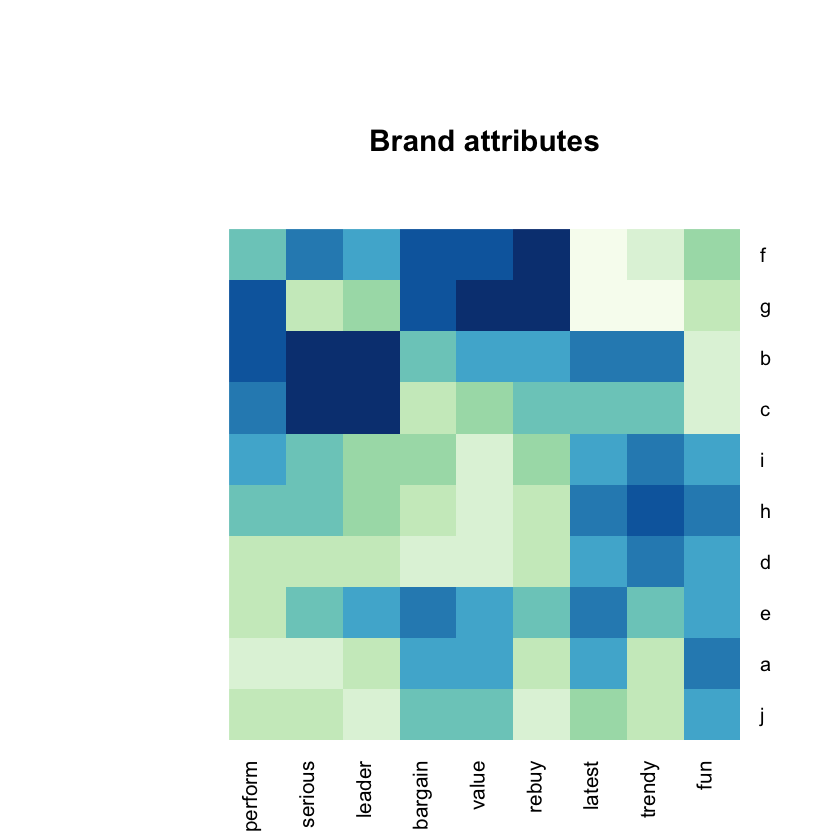

In [8]:
library(gplots)
library(RColorBrewer)
heatmap.2(as.matrix(brand.mean),
          col=brewer.pal(9, "GnBu"), trace="none", key=FALSE, dend="none",
          main="\n\n\n\n\nBrand attributes")

In this chart’s green-to-blue ("GnBu") palette a green color indicates a low value and dark blue indicates a high value; lighter colors are for values in the middle of the range. The brands are clearly perceived differently with some brands rated high on performance and leadership (brands b and c) and others rated high for value and intention to rebuy (brands f and g). By default, heatmap.2() sorts the columns and rows in order to emphasize similarities and patterns in the data

### Principal Component Analysis and Perceptual Maps

In [9]:
set.seed(98286)
xvar <- sample(1:10, 100, replace=TRUE)
yvar <- xvar
yvar[sample(1:length(yvar), 50)] <- sample(1:10, 50, replace=TRUE)
zvar <- yvar
zvar[sample(1:length(zvar), 50)] <- sample(1:10, 50, replace=TRUE)
my.vars <- cbind(xvar, yvar, zvar)

,xvar,yvar,zvar
xvar,1.0000000,0.5969717,0.2496469
yvar,0.5969717,1.0000000,0.5231468
zvar,0.2496469,0.5231468,1.0000000


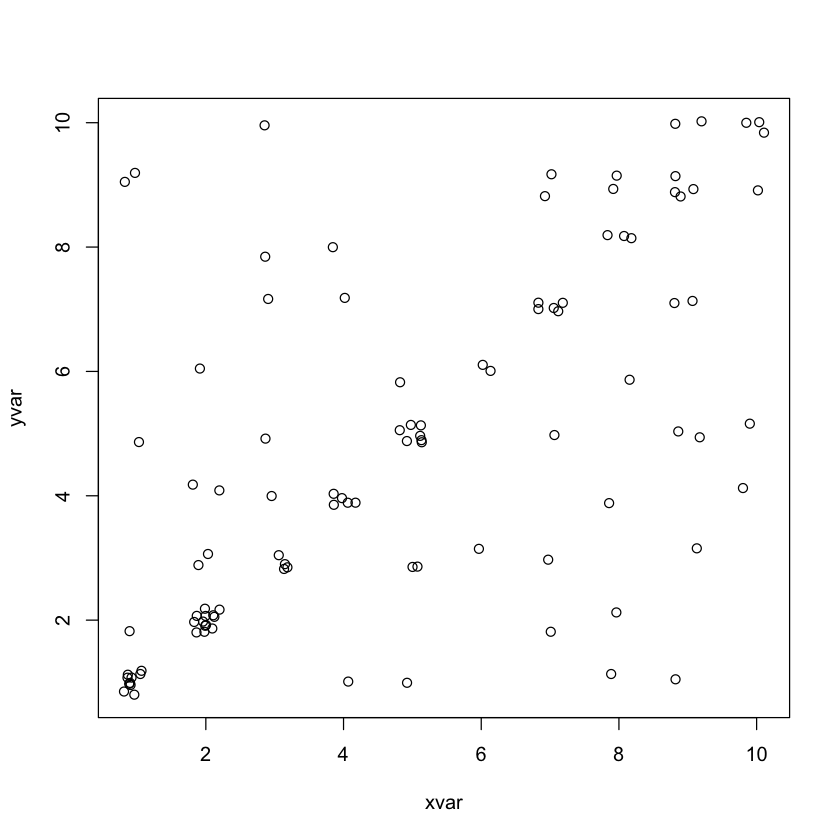

In [11]:
plot(yvar ~ xvar, data=jitter(my.vars)) 
cor(my.vars)

In [12]:
my.pca <- prcomp(my.vars)
summary(my.pca)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     3.9992 2.4381 1.6269
Proportion of Variance 0.6505 0.2418 0.1077
Cumulative Proportion  0.6505 0.8923 1.0000

In [13]:
my.pca

Standard deviations:
[1] 3.999154 2.438079 1.626894

Rotation:
            PC1         PC2        PC3
xvar -0.6156755  0.63704774  0.4638037
yvar -0.6532994 -0.08354009 -0.7524766
zvar -0.4406173 -0.76628404  0.4676165

In [14]:
cor(my.pca$x)

,PC1,PC2,PC3
PC1,1.000000e+00,4.808932e-16,1.768720e-15
PC2,4.808932e-16,1.000000e+00,-1.174441e-15
PC3,1.768720e-15,-1.174441e-15,1.000000e+00


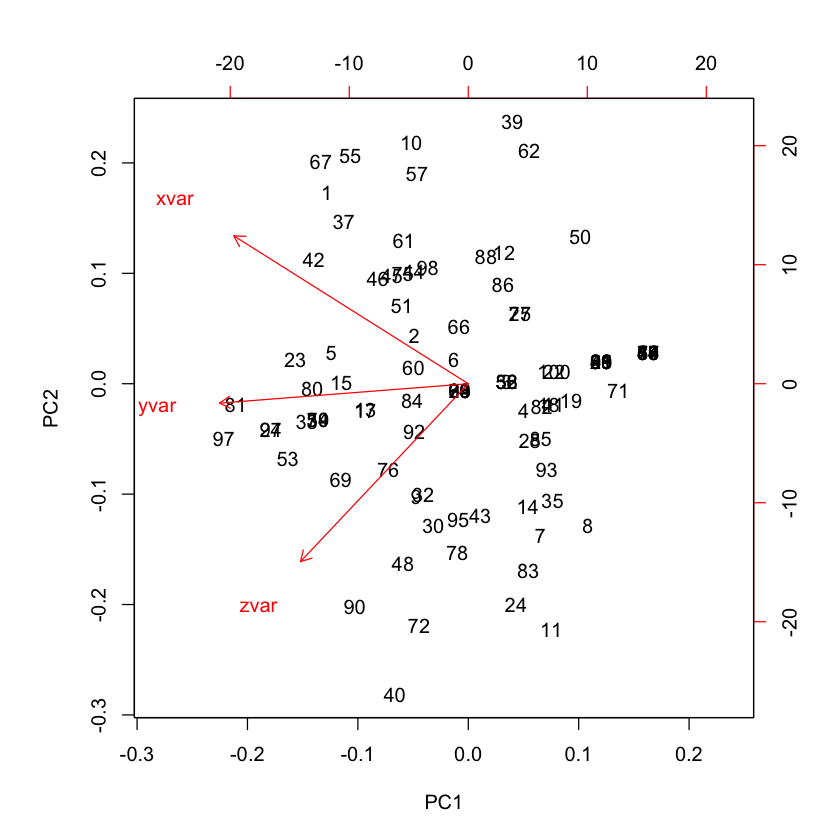

In [15]:
biplot(my.pca)

There are arrows that show the best fit of each of the variables on the prin- cipal components—a projection of the variables onto the two-dimensional space of the first two PCA components, which explain a large part of the variation in the data. These are useful to inspect because the direction and angle of the arrows reflect the relationship of the variables; a closer angle indicates higher positive associa- tion, while the relative direction indicates positive or negative association of the variables.

In [16]:
brand.pc <- prcomp(brand.sc[, 1:9])
summary(brand.pc)

Importance of components:
                         PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.726 1.4479 1.0389 0.8528 0.79846 0.73133 0.62458
Proportion of Variance 0.331 0.2329 0.1199 0.0808 0.07084 0.05943 0.04334
Cumulative Proportion  0.331 0.5640 0.6839 0.7647 0.83554 0.89497 0.93831
                           PC8     PC9
Standard deviation     0.55861 0.49310
Proportion of Variance 0.03467 0.02702
Cumulative Proportion  0.97298 1.00000

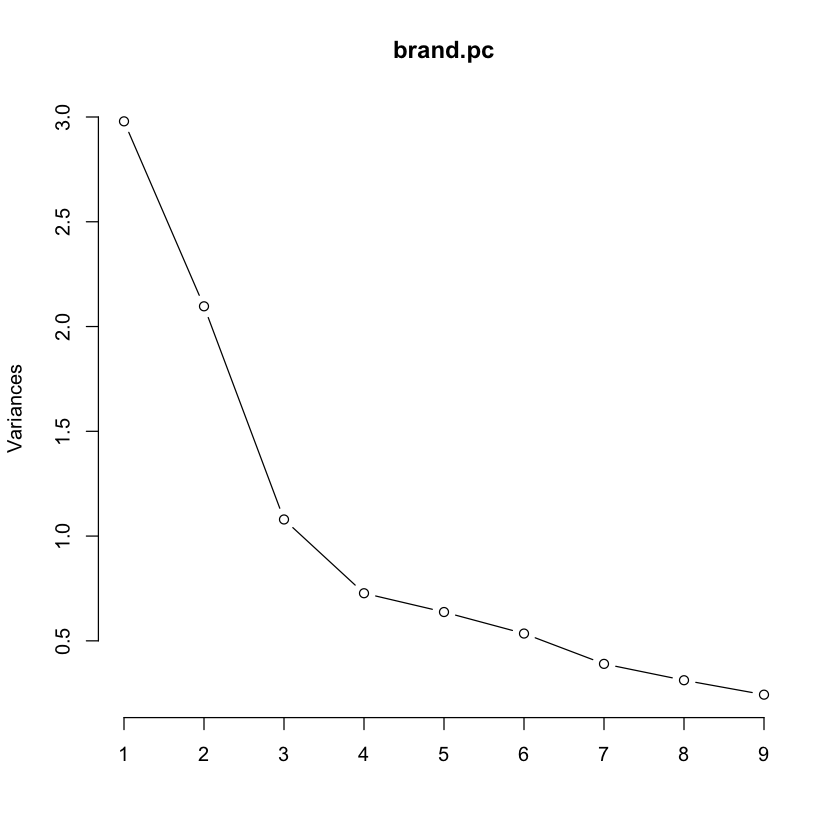

In [17]:
plot(brand.pc, type="l")

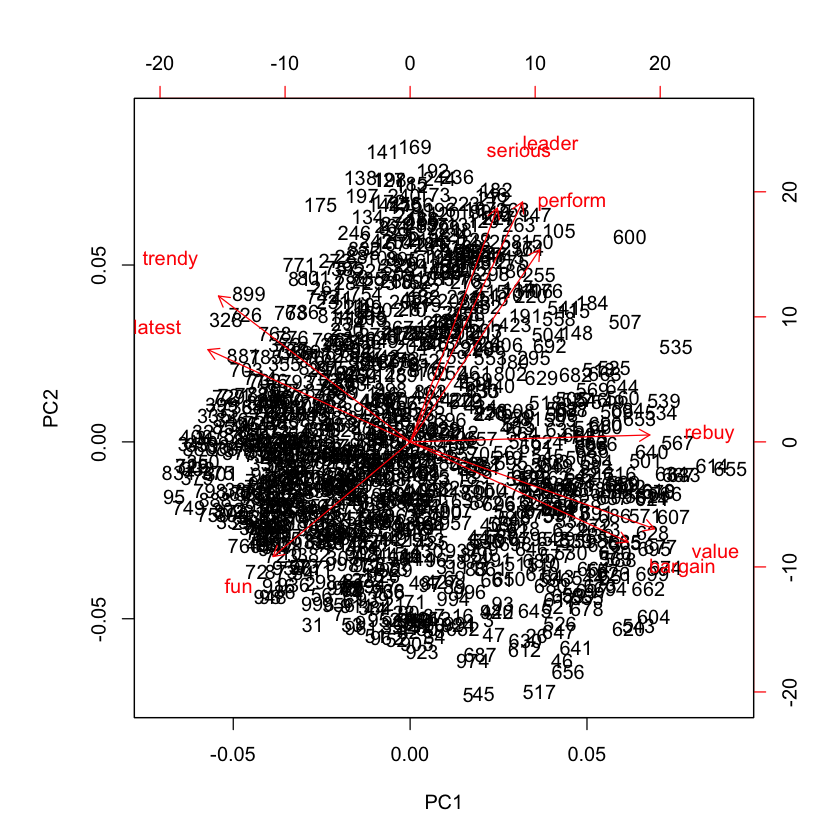

In [18]:
biplot(brand.pc)

In [19]:
brand.mean
brand.mu.pc <- prcomp(brand.mean, scale=TRUE)
summary(brand.mu.pc)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.8859187,-0.5279035,0.4109732,0.6566458,-0.9189407,0.2140961,0.1846926,-0.5251447,-0.5961664
b,0.9308702,1.070758,0.7261069,-0.9722147,1.183141,0.04161938,0.1513396,0.7403082,0.2369732
c,0.6499235,1.162768,-0.1023372,-0.8446753,1.222735,-0.607043,-0.4406775,0.02552787,-0.1324378
d,-0.6798911,-0.5930767,0.3524948,0.1865719,-0.6921751,-0.880756,-0.9326353,0.7366614,-0.4939889
e,-0.5643908,0.1928362,0.4564564,0.2958914,0.04211361,0.5515505,0.4181641,0.1385799,0.03654811
f,-0.05868665,0.2695106,-1.262159,-0.2179102,0.5892307,0.874007,1.022689,-0.813245,1.356996
g,0.9183837,-0.1675336,-1.2849,-0.5167168,-0.5337991,0.8965039,1.25616,-1.276393,1.360926
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.1414586,-0.7382753,-0.7825465,0.8643007,-0.6040262
i,0.3346388,-0.3208825,0.3557436,0.4124989,-0.1486575,-0.2545906,-0.8033921,0.5907878,-0.203176
j,-0.629945,-0.7885965,-0.154318,0.2849595,-0.6021887,-0.09711188,-0.07379367,-0.4813827,-0.9616475


Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1345 1.7349 0.7690 0.61498 0.50983 0.36662 0.21506
Proportion of Variance 0.5062 0.3345 0.0657 0.04202 0.02888 0.01493 0.00514
Cumulative Proportion  0.5062 0.8407 0.9064 0.94842 0.97730 0.99223 0.99737
                           PC8     PC9
Standard deviation     0.14588 0.04867
Proportion of Variance 0.00236 0.00026
Cumulative Proportion  0.99974 1.00000

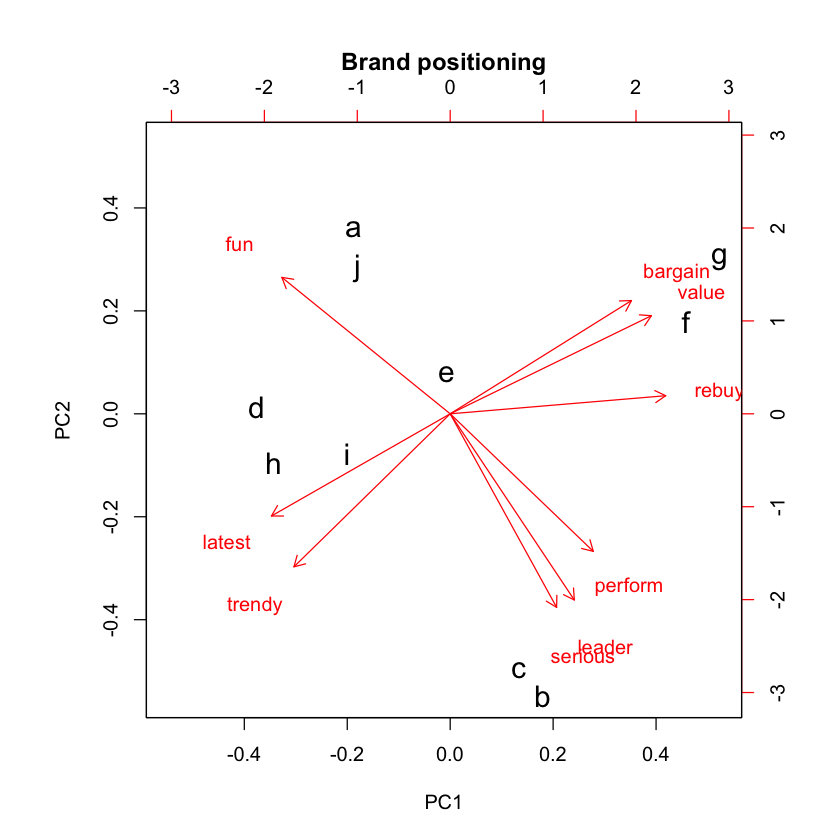

In [20]:
biplot(brand.mu.pc, main="Brand positioning", cex=c(1.5, 1))

Suppose you wanted to move in the direction of brand c. You could look at the specific differences from c in the data:

In [21]:
brand.mean["c", ] - brand.mean["e", ]

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
c,1.214314,0.9699315,-0.5587936,-1.140567,1.180621,-1.158594,-0.8588416,-0.113052,-0.1689859


Another option would be not to follow another brand but to aim for differentiated space where no brand is positioned. In Fig. 8.7, there is a large gap between the group b and c on the bottom of the chart, versus f and g on the upper right. This area might be described as the “value leader” area or similar.

This suggests that brand e could target the gap by increasing its emphasis on perfor- mance while reducing emphasis on “latest” and “fun.”

In [22]:
colMeans(brand.mean[c("b", "c", "f", "g"), ]) - brand.mean["e", ]

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
e,1.174513,0.3910396,-0.9372789,-0.9337707,0.5732131,-0.2502787,0.07921355,-0.4695304,0.6690661


Although we illustrated PCA with brand position, the same kind of analysis could be performed for product ratings, position of consumer segments, ratings of political candidates, evaluations of advertisements, or any other area where you have metric data on multiple dimensions that is aggregated for a modest number of discrete entities of interest.

### Exploratory Factor Analysis

Unlike PCA, EFA attempts to find solutions that are maximally inter- pretable in terms of the manifest variables. In general, it attempts to find solutions in which a small number of loadings for each factor are very high, while other load- ings for that factor are low. When this is possible, that factor can be interpreted in terms of that small set of variables.

EFA serves as a data reduction technique in three broad senses:
1. Inthetechnicalsenseofdimensionalreduction,wecanusefactorscoresinstead of a larger set of items. For instance, if we are assessing satisfaction, we could use a single satisfaction score instead of several separate items. (In Sect. 9.1.2 we review how this is also useful when observations are correlated.)
2. We can reduce uncertainty. If we believe satisfaction is imperfectly manifest in several measures, the combination of those will have less noise than the set of individual items.
3. We might also reduce data collection by focusing on items that are known to have high contribution to factors of interest. If we discover that some items are not important for a factor of interest, we can discard them from data collection efforts.

In [23]:
library(nFactors)
nScree(brand.sc[, 1:9])

Loading required package: MASS
Warning message:
: package ‘MASS’ was built under R version 3.2.2Loading required package: psych
Loading required package: boot

Attaching package: ‘boot’

The following object is masked from ‘package:psych’:

    logit

Loading required package: lattice

Attaching package: ‘lattice’

The following object is masked from ‘package:boot’:

    melanoma


Attaching package: ‘nFactors’

The following object is masked from ‘package:lattice’:

    parallel



  noc naf nparallel nkaiser
1   3   2         3       3

In [24]:
eigen(cor(brand.sc[, 1:9]))

-0.23746787,-0.41991179,0.03854006,0.52630873,0.46793435,0.33706757,0.36417911,-0.14444718,-0.05223384
-0.20582566,-0.52381901,-0.09512739,0.08923461,-0.29452974,0.29688599,-0.61367430,0.28766118,0.17889453
0.37038063,-0.20145317,-0.53273054,-0.21410754,0.10586676,0.17420585,-0.18548031,-0.64290436,-0.05750244
0.251060118,0.250379726,-0.417813462,0.750639524,-0.331494294,-0.140536707,-0.007114761,0.074612590,-0.031533061
-0.15974020,-0.51047254,-0.04067075,-0.09893394,-0.55515540,-0.39248744,0.44530286,-0.18354764,-0.09072231
-0.39917306,0.21849698,-0.48989756,-0.16734345,-0.01257429,0.13939661,0.28826490,0.05789194,0.64720849
-0.44745619,0.18980822,-0.36924507,-0.15118500,-0.06327757,0.21953273,0.01716301,0.14829295,-0.72806108
0.35102924,-0.31849032,-0.37090530,-0.16764432,0.36649697,-0.26581857,0.15357211,0.61450289,-0.05907022
-0.43901842,-0.01509832,-0.12461593,0.13031231,0.35568769,-0.67513997,-0.38865616,-0.20210688,0.01720236


In [25]:
factanal(brand.sc[, 1:9], factors=2)


Call:
factanal(x = brand.sc[, 1:9], factors = 2)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.635   0.332   0.796   0.835   0.527   0.354   0.225   0.708   0.585 

Loadings:
        Factor1 Factor2
perform          0.600 
leader           0.818 
latest  -0.451         
fun     -0.137  -0.382 
serious          0.686 
bargain  0.803         
value    0.873   0.117 
trendy  -0.534         
rebuy    0.569   0.303 

               Factor1 Factor2
SS loadings      2.245   1.759
Proportion Var   0.249   0.195
Cumulative Var   0.249   0.445

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 556.19 on 19 degrees of freedom.
The p-value is 8.66e-106 

In [26]:
factanal(brand.sc[, 1:9], factors=3)


Call:
factanal(x = brand.sc[, 1:9], factors = 3)

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.607         
leader           0.810   0.106 
latest  -0.163           0.981 
fun             -0.398   0.205 
serious          0.682         
bargain  0.826          -0.122 
value    0.867          -0.198 
trendy  -0.356           0.586 
rebuy    0.499   0.296  -0.298 

               Factor1 Factor2 Factor3
SS loadings      1.853   1.752   1.510
Proportion Var   0.206   0.195   0.168
Cumulative Var   0.206   0.401   0.568

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is 3.28e-09 

In [27]:
library(GPArotation)
(brand.fa.ob <- factanal(brand.sc[, 1:9], factors=3, rotation="oblimin"))


Call:
factanal(x = brand.sc[, 1:9], factors = 3, rotation = "oblimin")

Uniquenesses:
perform  leader  latest     fun serious bargain   value  trendy   rebuy 
  0.624   0.327   0.005   0.794   0.530   0.302   0.202   0.524   0.575 

Loadings:
        Factor1 Factor2 Factor3
perform          0.601         
leader           0.816         
latest                   1.009 
fun             -0.381   0.229 
serious          0.689         
bargain  0.859                 
value    0.880                 
trendy  -0.267   0.128   0.538 
rebuy    0.448   0.255  -0.226 

               Factor1 Factor2 Factor3
SS loadings      1.789   1.733   1.430
Proportion Var   0.199   0.193   0.159
Cumulative Var   0.199   0.391   0.550

Factor Correlations:
        Factor1 Factor2 Factor3
Factor1  1.0000  -0.388  0.0368
Factor2 -0.3884   1.000 -0.1091
Factor3  0.0368  -0.109  1.0000

Test of the hypothesis that 3 factors are sufficient.
The chi square statistic is 64.57 on 12 degrees of freedom.
The p-value is

Do you wish to allow the factors to be correlated with one another or not?

The default in factanal() is to find factors that have zero correlation (using a varimax rotation). EFA focuses on the underlying latent dimensions, whereas PCA focuses on transforming the dimensionality of the data.

In many categories, the leader can command a price premium, and thus we might expect those two latent constructs to be negatively cor- related rather than independent of one another. This suggests that we could allow correlated factors in our solution. This is known as an oblique rotation.

The negative correlation between factors 1 and 2 is consistent with our theory that brands that are leaders are less likely to be value brands, and thus we think this is a more interpretable result.

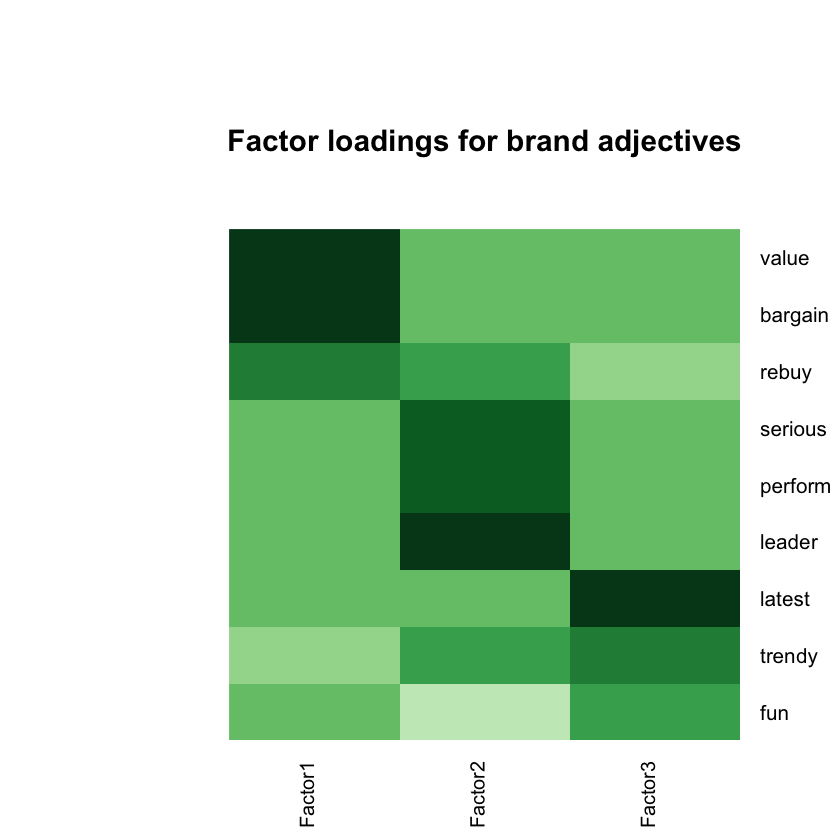

In [30]:
library(gplots)
library(RColorBrewer)
heatmap.2(brand.fa.ob$loadings,
          col=brewer.pal(9, "Greens"), trace="none", key=FALSE, dend="none",
          Colv=FALSE, cexCol = 1.2,
          main="\n\n\n\n\nFactor loadings for brand adjectives")

Warning message:
: replacing previous import by ‘ggplot2::unit’ when loading ‘Hmisc’Warning message:
: replacing previous import by ‘ggplot2::arrow’ when loading ‘Hmisc’Warning message:
: replacing previous import by ‘scales::alpha’ when loading ‘Hmisc’

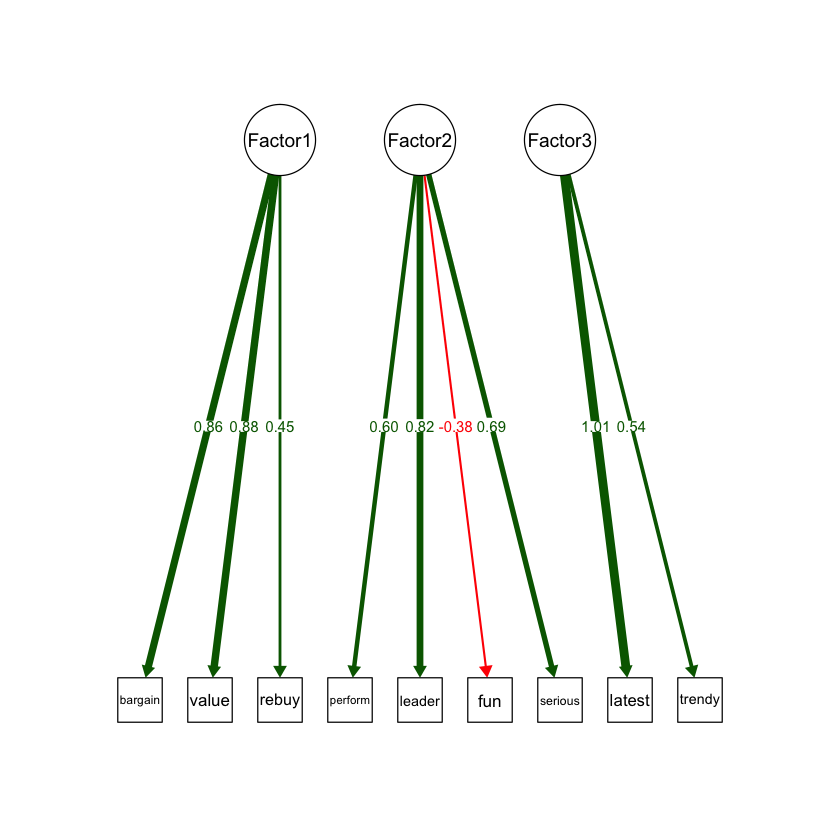

In [31]:
library(semPlot)
semPaths(brand.fa.ob, what="est", residuals=FALSE,
         cut=0.3, posCol=c("white", "darkgreen"), negCol=c("white", "red"),
         edge.label.cex=0.75, nCharNodes=7)

In [32]:
brand.fa.ob <- factanal(brand.sc[, 1:9], factors=3, rotation="oblimin", scores="Bartlett")
brand.scores <- data.frame(brand.fa.ob$scores)
brand.scores$brand <- brand.sc$brand
head(brand.scores)

,Factor1,Factor2,Factor3,brand
1,1.652136,-0.6886749,0.5256104,a
2,-1.400533,-1.66819,-0.6764121,a
3,1.145731,-1.061801,-0.4285853,a
4,0.2009725,-0.3245462,1.211342,a
5,2.000201,-1.907152,-0.4559905,a
6,1.417506,0.3339462,0.8555525,a


In [34]:
brand.fa.mean <- aggregate(. ~ brand, data=brand.scores, mean)
rownames(brand.fa.mean) <- brand.fa.mean[, 1]           # brand names
brand.fa.mean <- brand.fa.mean[, -1]
names(brand.fa.mean) <- c("Leader", "Value", "Latest")  # factor names
brand.fa.mean

,Leader,Value,Latest
a,0.2315879,-1.069937,0.3932665
b,0.09686823,1.519131,0.7239117
c,-0.5893714,1.450695,-0.07690784
d,-1.043804,-0.7818686,0.3791464
e,0.5216976,-0.0537343,0.4370935
f,1.152185,0.454429,-1.283958
g,1.368739,0.04408369,-1.319
h,-0.9159208,-0.3141856,0.5267652
i,-0.6691851,-0.207419,0.373312
j,-0.1527967,-1.041193,-0.1536295


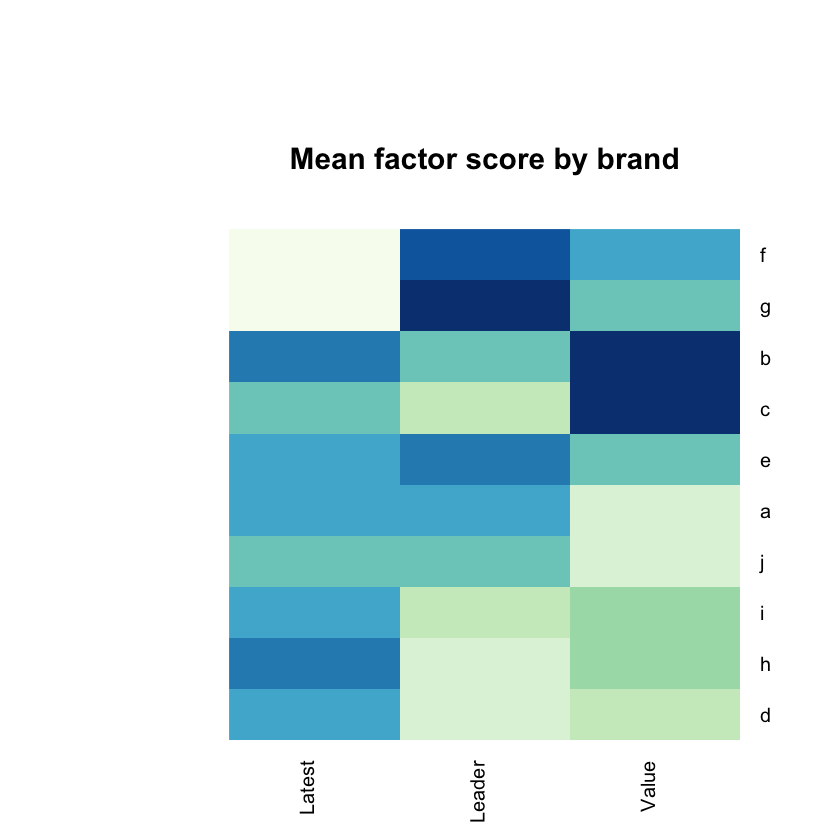

In [35]:
heatmap.2(as.matrix(brand.fa.mean),
          col=brewer.pal(9, "GnBu"), trace="none", key=FALSE, dend="none",
          cexCol=1.2, main="\n\n\n\n\n\nMean factor score by brand")

### Multidimensional Scaling

Instead of extracting underlying components or latent factors, MDS works instead with distances (also known as similarities). MDS attempts to find a lower-dimensional map that best preserves all the observed similarities between items.

If you have similarity data already, such as ratings of whether one product is like an- other, you can apply MDS directly to the data. If you have other kinds of data, such as the brand rating data we’ve considered in this chapter, then you must compute the distances between points before applying MDS. If you have metric data—where you consider the units of measurement to have interval or ratio properties—then you might simply calculate euclidian distances with the default dist() command.

In [37]:
brand.dist <- dist(brand.mean)
(brand.mds <- cmdscale(brand.dist))

a,-0.7570113,1.4619032
b,0.5586301,-2.1698618
c,0.3894979,-1.9060516
d,-1.7923138,0.2561488
e,4.680797e-05,2.292118e-01
f,2.3617829,0.4295718
g,2.667463,1.030442
h,-1.646706,-0.270915
i,-0.9923031,-0.2576957
j,-0.7890864,1.1972468


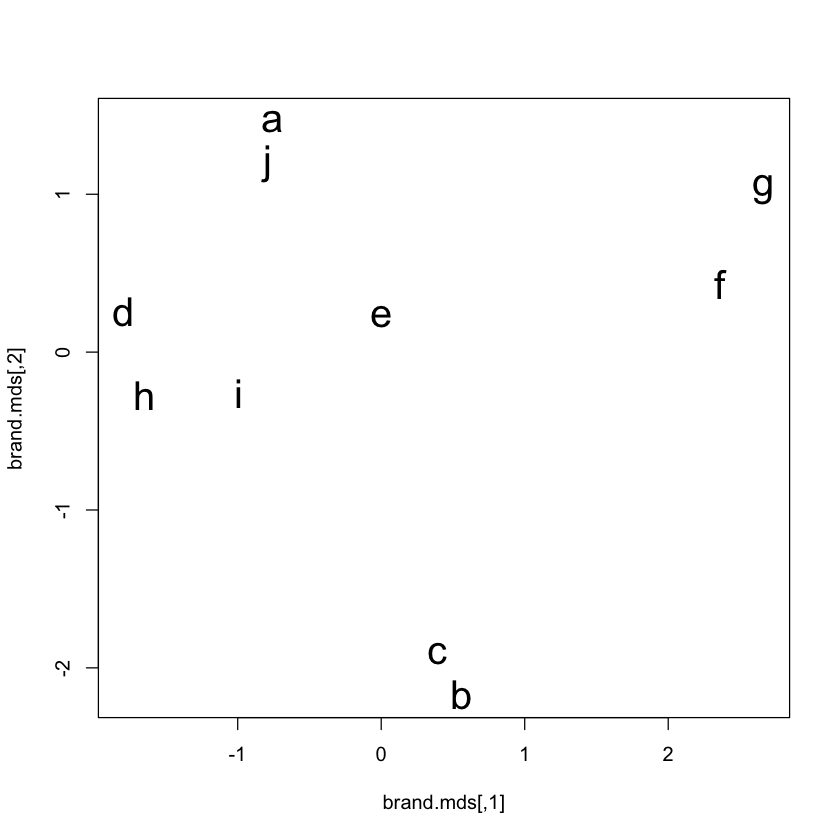

In [38]:
plot(brand.mds, type="n")
text(brand.mds, rownames(brand.mds), cex=2)

For non-metric data such as rankings or categorical variables, you would use a dif- ferent method to compute distance and an MDS algorithm that does not assume metric distances.

In [39]:
brand.rank <- data.frame(lapply(brand.mean, function(x) ordered(rank(x))))
str(brand.rank)

'data.frame':	10 obs. of  9 variables:
 $ perform: Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 10 8 2 4 5 9 6 7 3
 $ leader : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 3 9 10 2 7 8 6 5 4 1
 $ latest : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 7 10 4 5 8 2 1 9 6 3
 $ fun    : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 9 1 2 5 7 4 3 10 8 6
 $ serious: Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 1 9 10 2 7 8 4 6 5 3
 $ bargain: Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 7 6 3 1 8 9 10 2 4 5
 $ value  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 7 6 4 1 8 9 10 3 2 5
 $ trendy : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 3 9 5 8 6 2 1 10 7 4
 $ rebuy  : Ord.factor w/ 10 levels "1"<"2"<"3"<"4"<..: 3 8 6 4 7 9 10 2 5 1


In [40]:
brand.rank

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
1,1,3,7,9,1,7,7,3,3
2,10,9,10,1,9,6,6,9,8
3,8,10,4,2,10,3,4,5,6
4,2,2,5,5,2,1,1,8,4
5,4,7,8,7,7,8,8,6,7
6,5,8,2,4,8,9,9,2,9
7,9,6,1,3,4,10,10,1,10
8,6,5,9,10,6,2,3,10,2
9,7,4,6,8,5,4,2,7,5
10,3,1,3,6,3,5,5,4,1


In [41]:
brand.mean

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.8859187,-0.5279035,0.4109732,0.6566458,-0.9189407,0.2140961,0.1846926,-0.5251447,-0.5961664
b,0.9308702,1.070758,0.7261069,-0.9722147,1.183141,0.04161938,0.1513396,0.7403082,0.2369732
c,0.6499235,1.162768,-0.1023372,-0.8446753,1.222735,-0.607043,-0.4406775,0.02552787,-0.1324378
d,-0.6798911,-0.5930767,0.3524948,0.1865719,-0.6921751,-0.880756,-0.9326353,0.7366614,-0.4939889
e,-0.5643908,0.1928362,0.4564564,0.2958914,0.04211361,0.5515505,0.4181641,0.1385799,0.03654811
f,-0.05868665,0.2695106,-1.262159,-0.2179102,0.5892307,0.874007,1.022689,-0.813245,1.356996
g,0.9183837,-0.1675336,-1.2849,-0.5167168,-0.5337991,0.8965039,1.25616,-1.276393,1.360926
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.1414586,-0.7382753,-0.7825465,0.8643007,-0.6040262
i,0.3346388,-0.3208825,0.3557436,0.4124989,-0.1486575,-0.2545906,-0.8033921,0.5907878,-0.203176
j,-0.629945,-0.7885965,-0.154318,0.2849595,-0.6021887,-0.09711188,-0.07379367,-0.4813827,-0.9616475


In [42]:
library(cluster)
brand.dist.r <- daisy(brand.rank, metric="gower")

In [43]:
brand.mds.r <- isoMDS(brand.dist.r)

initial  value 9.063777 
iter   5 value 7.918224
iter  10 value 7.772503
final  value 7.655470 
converged


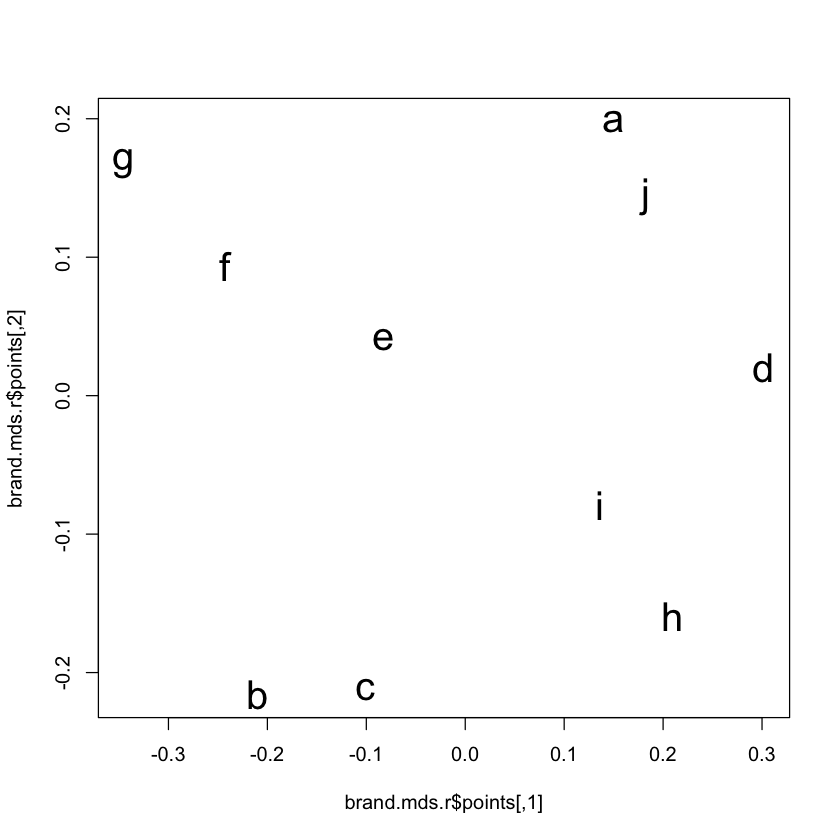

In [44]:
plot(brand.mds.r$points, type="n")
text(brand.mds.r$points, levels(brand.sc$brand), cex=2)

We generally recommend PCA as a more informative procedure than MDS for typ- ical metric or near-metric (e.g., survey Likert scale) data. However, PCA will not work with non-metric data. In those cases, MDS is a valuable alternative.

** Principal Component Analysis **
- PCA finds linear functions that explain maximal variance in observed data. A key concept is that such components are orthogonal (uncorrelated). The basic R command is prcomp() (Sect. 8.2.1).
- A common use for PCA is a biplot of aggregate scores for brands or people to visualize relationships. When this is done for attitudinal data such as brand ratings it is called a perceptual map. This is created by aggregating the statistic of interest by entity and charting with biplot() (Sect. 8.2.2).
- Because PCA components often load on many variables, the results must be inspected cautiously and in terms of relative position. It is particularly difficult to read the status of individual items from a PCA biplot (Sect. 8.2.5).

** Exploratory Factor Analysis **
- EFA models latent variables (factors) that are not observed directly but appear indirectly as observed manifest variables. A key procedure is factanal() (Sect. 8.3.1).
- A fundamental decision in EFA is the number of factors to extract. Common criteria involve inspection of a scree plot and extraction of factors such that all eigenvalues are greater than 1.0. There are useful tools to determine the number of factors in nFactors, but the final determination depends on one’s theory and the utility of results (Sect. 8.3.2).
- EFA uses rotation to adjust an initial solution to one that is mathematically equivalent but more interpretable according to one’s aims. Another key deci- sion in EFA is whether one believes the underlying latent variables should be uncorrelated (calling for an orthogonal rotation such as varimax) or corre- lated (calling for an oblique rotation such as oblimin) (Sect. 8.3.3).
- After performing EFA, you can extract factor scores that are the best esti- mates for each observation (respondent) on each factor. These are present as $scores in factanal() objects if you request them with the scores ar- gument (Sect. 8.3.4).

** Multidimensional Scaling **
- MDS is similar to PCA but is able to work with both metric and non-metric data. MDS requires a distance score obtained from dist() for metric data or a procedure such as daisy() for non-metric data. MDS scaling is then performed by cmdscale() for metric data or isoMDS() (or other options) for non-metric data (Sect. 8.4).